# Calculating Influence Diagrams of Beams

## Setting up the model

In [56]:
from sigmaepsilon.solid.fourier import NavierBeam

# geometry
beam_length = 1000.0
width, height = 20.0, 80.0  # rectangular cross-section

# material properties
young_modulus, poisson_ratio = 210000.0, 0.25  # material
area = width * height
shear_modulus = young_modulus / (2 * (1 + poisson_ratio))

# stiffness properties
inertia = width * height**3 / 12
bending_stiffness = young_modulus * inertia
shear_correction_factor = 5 / 6
shear_stiffness = shear_modulus * area * shear_correction_factor

# solution parameters
number_of_modes = 50

beam = NavierBeam(
    beam_length, number_of_modes, EI=bending_stiffness, GA=shear_stiffness
)

## Calculation

In [57]:
from sigmaepsilon.solid.fourier import LoadGroup, PointLoad
import numpy as np

# the location of the cross-section of which the infleunce diagrams are calculated
evaluation_point = np.array([beam_length/3])

number_of_loads = 100
solutions = []
load_positions = []
for i in range(number_of_loads):
    load_position = beam_length *  i / (number_of_loads - 1)
    beam_loads = LoadGroup(LC=PointLoad(load_position, [-1.0, 0.0]))
    solution = beam.solve(beam_loads, evaluation_point)
    solutions.append(solution["LC"].to_xarray())
    load_positions.append(load_position)

## Plotting with ``Matplotlib``

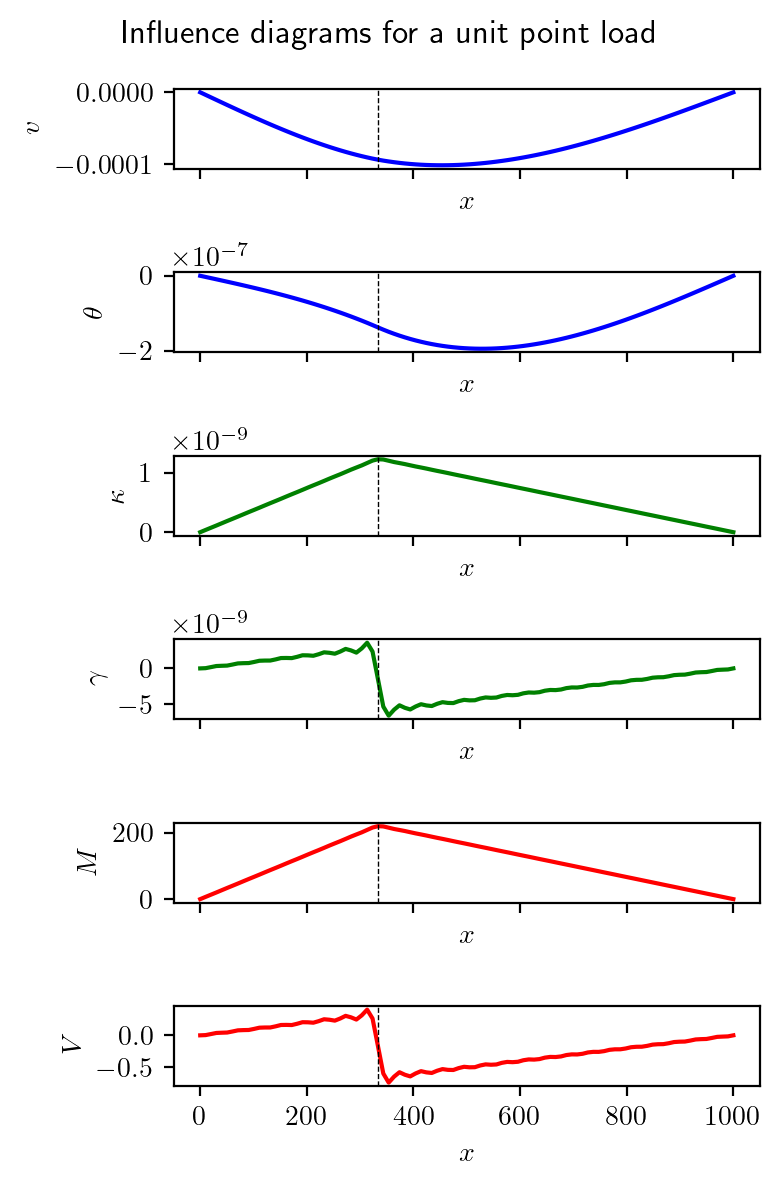

In [58]:
from sigmaepsilon.solid.fourier import BeamLoadCaseResultLinStat
import matplotlib.pyplot as plt

fig, axs = plt.subplots(6, 1, figsize=(4, 6), dpi=200, sharex=True)

labels = [r"$v$", r"$\theta$", r"$\kappa$", r"$\gamma$", r"$M$", r"$V$"]
colors = ["b", "b", "g", "g", "r", "r"]
components = BeamLoadCaseResultLinStat.components

plt.rcParams.update(
    {
        "text.usetex": True,
        "font.family": "sans-serif",
    }
)
for i in range(6):
    component = components[i]
    data = [float(s.loc[0, component].values) for s in solutions]
    axs[i].plot(load_positions, data, colors[i])
    axs[i].set_xlabel("$x$")
    axs[i].set_ylabel(labels[i])
    axs[i].axvline(x=evaluation_point, color='black', linestyle='dashed', lw=0.5)

fig.suptitle("Influence diagrams for a unit point load")
plt.subplots_adjust(hspace=0.1)
fig.tight_layout()